In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [253]:
df=pd.read_csv('emp_salary.csv')

In [254]:
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [255]:
df.columns

Index(['SNo', 'Name', 'Age', 'City', 'Country', 'Salary'], dtype='object')

In [256]:
df.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [257]:
df.shape

(22, 6)

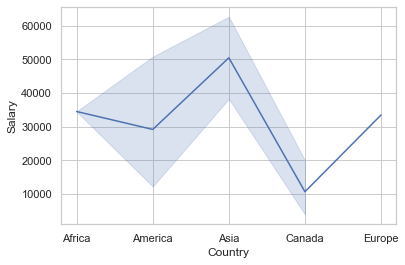

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=df['Country'],y=df['Salary'], data=df)
plt.show()

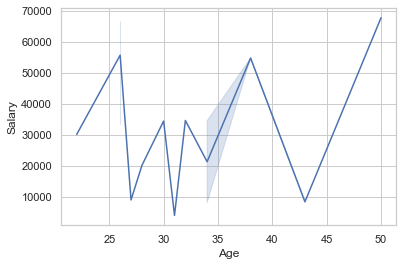

In [259]:
sns.lineplot(x=df['Age'],y=df['Salary'], data=df)
plt.show()

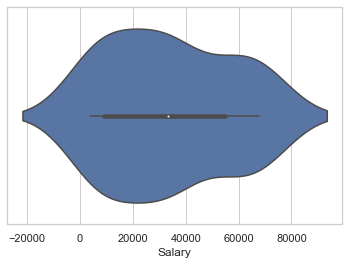

In [260]:
sns.violinplot(x='Salary', data=df)
plt.show()

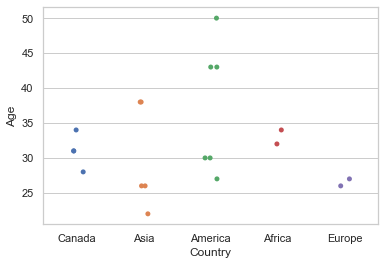

In [261]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='Country',y='Age', data=df)
plt.show()

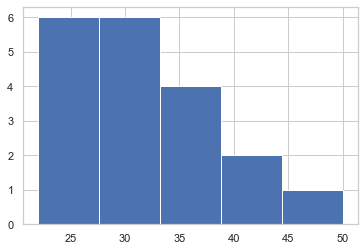

In [262]:
df.Age.hist(bins=5)

I want to use the Heatmap for further EDA analysis.

But to perform the heatmap i need to clear the all NA values from the dataset

In [263]:
df.isnull().sum()
# Due to short short dataset, we fill the NA values with Mean, Median & Mode. 

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [264]:
df.dropna(inplace=True)

In [265]:
df.isnull().sum()

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [266]:
# To Use the heatmap properly, we have to conver the all sring values in numeric values

from sklearn.preprocessing import LabelEncoder
colum=df[['Name','City','Country']]
lbl = LabelEncoder()
for col in colum:
    df[col]=lbl.fit_transform(df[col]) 

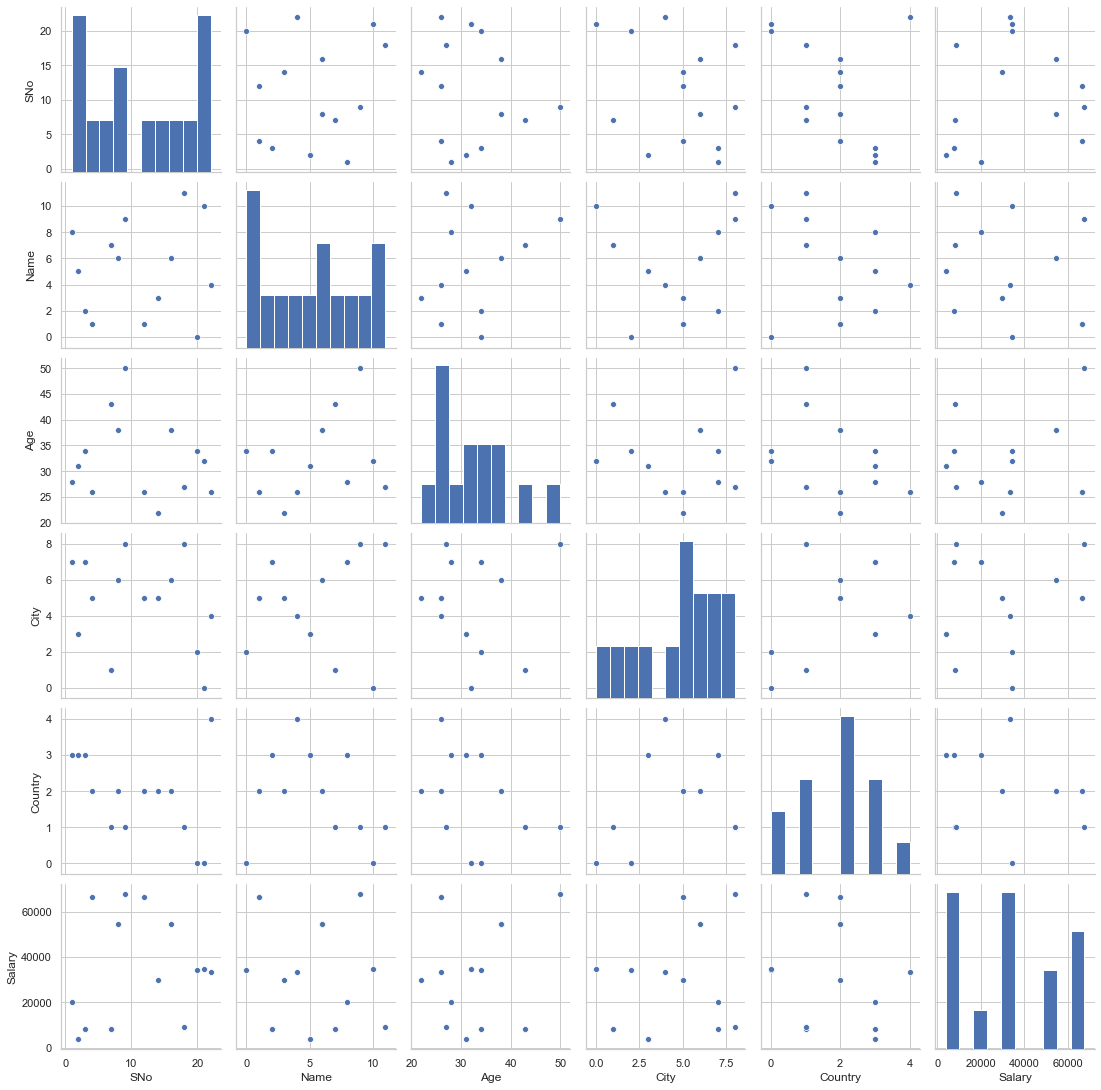

In [267]:
sns.pairplot(df)

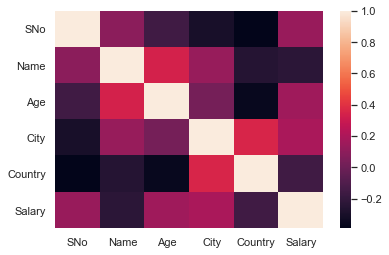

In [268]:
sns.heatmap(df.corr())   

Highlights :-
    1. Asia hold the highest salaried employees.
    2. City & Age are the two major impactable components towards Salary.
    3. Age have the direct relation with salary. Means Salary is being increased as well as the age increased.
    4. Mostly people earned the salary between 20-30k.
    5. America have most aged people in his country

In [269]:
df.skew()

SNo        0.093151
Name       0.098597
Age        0.905716
City      -0.562357
Country   -0.020726
Salary     0.142454
dtype: float64

In [270]:
# removing the outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.4359717 , 0.81802182, 0.60618972, 0.9129501 , 1.01600102,
        0.66772444],
       [1.29538706, 0.06292476, 0.20206324, 0.73625008, 1.01600102,
        1.37814335],
       [1.15480242, 0.94387133, 0.20206324, 0.9129501 , 1.01600102,
        1.19722921],
       [1.01421777, 1.23752019, 0.87560737, 0.08835001, 0.12700013,
        1.39169615],
       [0.59246385, 0.52437296, 1.41444268, 1.56085017, 0.76200076,
        1.18399159],
       [0.45187921, 0.2307241 , 0.74089855, 0.50065005, 0.12700013,
        0.86192662],
       [0.31129456, 1.11167068, 2.35740446, 1.32525014, 0.76200076,
        1.43555679],
       [0.11045936, 1.23752019, 0.87560737, 0.08835001, 0.12700013,
        1.39169615],
       [0.39162865, 0.65022247, 1.41444268, 0.08835001, 0.12700013,
        0.22616158],
       [0.67279793, 0.2307241 , 0.74089855, 0.50065005, 0.12700013,
        0.86192662],
       [0.95396721, 1.6989684 , 0.74089855, 1.32525014, 0.76200076,
        1.15804586],
       [1.2351365 , 1

In [271]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [272]:
data=df[(z<3).all (axis=1)]

In [273]:
data.shape

(14, 6)

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [275]:
x=df.drop(['Salary'], axis=1)
x

,SNo,Name,Age,City,Country
0,1,8,28.0,7,3
1,2,5,31.0,3,3
2,3,2,34.0,7,3
3,4,1,26.0,5,2
6,7,7,43.0,1,1
7,8,6,38.0,6,2
8,9,9,50.0,8,1
10,12,1,26.0,5,2
12,14,3,22.0,5,2
14,16,6,38.0,6,2


In [276]:
y=df['Salary']
y

0     20000.0
1      3900.0
2      8000.0
3     66672.0
6      8300.0
7     54666.0
8     67666.0
10    66672.0
12    30007.0
14    54666.0
16     8888.0
18    34432.0
19    34534.0
20    33451.0
Name: Salary, dtype: float64

In [277]:
# PCA (Princple Component Analysis)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x)
x_pca=pca.transform(x)

In [278]:
x.shape

(14, 5)

In [279]:
x_pca.shape

(14, 2)

In [280]:
y.shape

(14,)

In [281]:
y_data=np.array(y)
y=y_data.reshape(-1,1)
y.shape

(14, 1)

In [282]:
max_r_score=0
for r_state in range(42,101):
    x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,'is: ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('Max r2 score corresponding to:',final_r_state,'is: ',max_r_score)

r2_score corresponding to random state:  42 is:  -15.798322729288277
r2_score corresponding to random state:  43 is:  -1.9623570237687864
r2_score corresponding to random state:  44 is:  -7.772695813965601
r2_score corresponding to random state:  45 is:  -8.094466211109077
r2_score corresponding to random state:  46 is:  -0.837407576100857
r2_score corresponding to random state:  47 is:  -1.2100784455862565
r2_score corresponding to random state:  48 is:  -10.325059197678357
r2_score corresponding to random state:  49 is:  -2.1053249406469114
r2_score corresponding to random state:  50 is:  -3.684161294412031
r2_score corresponding to random state:  51 is:  -0.5849078359969879
r2_score corresponding to random state:  52 is:  0.5109941565615135
r2_score corresponding to random state:  53 is:  -6.60511240029966
r2_score corresponding to random state:  54 is:  -0.31762031831708115
r2_score corresponding to random state:  55 is:  -66.16532602415182
r2_score corresponding to random state:  

In [283]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

-992.0582772691374

In [284]:
x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  -15.798322729288277
Root_Mean_Squared_Error:  58274.59371128076


In [285]:
lr.score(x,y)

-0.8353578888499853

In [286]:
from sklearn.model_selection import GridSearchCV
alphabets={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model, param_grid=alphabets)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 1}


In [287]:
rd=Ridge(alpha=1)
rd.fit(x,y)
rd.score(x,y)

0.2913702920317688